# Objective:
The goal of this project is to develop an accurate flood prediction model for the coastal areas of Boston, utilizing machine learning techniques to predict the likelihood of floods based on various environmental factors. The model will leverage historical flood events, rainfall data, river levels, and soil moisture levels to provide timely and actionable flood risk forecasts.

Key Features:

Data Sources: Historical flood event data, real-time rainfall data, river levels, and soil moisture conditions.

Target Variable: Binary classification — "Flood" (1) or "No Flood" (0).

Primary Tools: Python, Scikit-learn, Pandas, Matplotlib, and Keras (for Neural Networks).

Methodology:

Data Preprocessing:

Clean and merge datasets from multiple sources, ensuring all relevant features are included.

Perform feature engineering to derive additional meaningful features, such as aggregated rainfall data and moving averages for river levels.

Scale the features using StandardScaler to ensure optimal performance of machine learning models.

Model Development:

Logistic Regression: Used as a baseline model due to its simplicity and interpretability. It predicts the probability of a flood event based on the input features.

Neural Networks: A more complex model capable of capturing nonlinear relationships in the data. It is used to refine predictions, especially when interactions between features are non-linear.

Model Evaluation:

Evaluate the models using key metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

Use cross-validation to ensure the model generalizes well to unseen data and avoids overfitting.

Plot ROC curves to visually compare model performance and determine the best model for deployment.

Outcome & Impact:

The expected outcome is to achieve a high level of accuracy and predictive power, with a focus on minimizing false negatives (i.e., failing to predict a flood when one is imminent) and false positives (i.e., predicting a flood when there isn't one).

The final model will provide a reliable early-warning system for flood-prone coastal regions in Boston, potentially aiding local authorities in taking proactive flood control measures.

# Exploratory Data Analysis

In [2]:
# Read the rainfall data
import  pandas as pd
rainfall_data = pd.read_csv('D://2025//CS436//Rainfull_2010_2025.csv')

In [3]:
rainfall_data 

,STATION,NAME,DATE,PRCP,SNOW
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/3/2010,0.20,3.7
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/4/2010,0.00,0.0
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/5/2010,0.00,0.0
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/6/2010,0.00,0.0
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/7/2010,0.00,0.0
...,...,...,...,...,...
5595,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",4/29/2025,0.00,0.0
5596,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",4/30/2025,0.00,0.0
5597,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",5/1/2025,0.00,0.0
5598,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",5/2/2025,0.29,0.0


In [4]:
rainfall_data.describe()

,PRCP,SNOW
count,5599.000000,5599.000000
mean,0.119318,0.119111
std,0.310824,0.947933
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.050000,0.000000
max,3.400000,23.600000


In [5]:
rainfall_data.isnull().sum()

STATION    0
NAME       0
DATE       0
PRCP       1
SNOW       1
dtype: int64

In [6]:
# Convert the 'DATE' column to datetime format (YYYY-MM-DD)
rainfall_data['DATE'] = pd.to_datetime(rainfall_data['DATE'], format='%m/%d/%Y')

In [7]:
rainfall_data

,STATION,NAME,DATE,PRCP,SNOW
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-03,0.20,3.7
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-04,0.00,0.0
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-05,0.00,0.0
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-06,0.00,0.0
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-07,0.00,0.0
...,...,...,...,...,...
5595,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2025-04-29,0.00,0.0
5596,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2025-04-30,0.00,0.0
5597,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2025-05-01,0.00,0.0
5598,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2025-05-02,0.29,0.0


In [8]:
rainfall_data.isnull().sum()

STATION    0
NAME       0
DATE       0
PRCP       1
SNOW       1
dtype: int64

In [9]:
# Read the river_level_neponset data
river_level_neponset_data = pd.read_csv('D://2025//CS436//river_level_neponset_2010_2024.csv')

In [10]:

river_level_neponset_data

,DATE,River_Level_m
0,1/1/2010,1.649014
1,1/2/2010,1.458521
2,1/3/2010,1.694307
3,1/4/2010,1.956909
4,1/5/2010,1.429754
...,...,...
5474,12/27/2024,1.449044
5475,12/28/2024,1.991022
5476,12/29/2024,1.445010
5477,12/30/2024,1.494062


In [11]:
river_level_neponset_data.describe()

,River_Level_m
count,5479.000000
mean,1.500549
std,0.298024
min,0.527620
25%,1.302545
50%,1.501534
75%,1.697805
max,2.677871


In [12]:
river_level_neponset_data.isnull().sum()

DATE             0
River_Level_m    0
dtype: int64

In [13]:
# Convert the 'DATE' column to datetime format (YYYY-MM-DD)
river_level_neponset_data['DATE'] = pd.to_datetime(river_level_neponset_data['DATE'], format='%m/%d/%Y')

In [14]:
river_level_neponset_data

,DATE,River_Level_m
0,2010-01-01,1.649014
1,2010-01-02,1.458521
2,2010-01-03,1.694307
3,2010-01-04,1.956909
4,2010-01-05,1.429754
...,...,...
5474,2024-12-27,1.449044
5475,2024-12-28,1.991022
5476,2024-12-29,1.445010
5477,2024-12-30,1.494062


In [15]:
# Read the soil_moisture data
soil_moisture_data = pd.read_csv('D://2025//CS436//soil_moisture_2010_2024.csv')

In [16]:
soil_moisture_data

,DATE,Soil_Moisture_%
0,1/1/2010,37.573999
1,1/2/2010,25.915186
2,1/3/2010,31.214969
3,1/4/2010,29.650844
4,1/5/2010,43.580733
...,...,...
5474,12/27/2024,37.940441
5475,12/28/2024,46.840800
5476,12/29/2024,32.857925
5477,12/30/2024,26.427123


In [17]:
# Convert the 'DATE' column to datetime format (YYYY-MM-DD)
soil_moisture_data['DATE'] = pd.to_datetime(soil_moisture_data['DATE'], format='%m/%d/%Y')

In [18]:
soil_moisture_data

,DATE,Soil_Moisture_%
0,2010-01-01,37.573999
1,2010-01-02,25.915186
2,2010-01-03,31.214969
3,2010-01-04,29.650844
4,2010-01-05,43.580733
...,...,...
5474,2024-12-27,37.940441
5475,2024-12-28,46.840800
5476,2024-12-29,32.857925
5477,2024-12-30,26.427123


Now we have all 3 features considered during our work, so lest merge them 

In [19]:

# Merge the datasets on 'DATE' (or other relevant columns)
combined_data = pd.merge(rainfall_data, river_level_neponset_data, left_on='DATE', right_on='DATE', how='inner')


In [20]:
combined_data

,STATION,NAME,DATE,PRCP,SNOW,River_Level_m
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-03,0.20,3.7,1.694307
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-04,0.00,0.0,1.956909
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-05,0.00,0.0,1.429754
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-06,0.00,0.0,1.429759
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-07,0.00,0.0,1.973764
...,...,...,...,...,...,...
5472,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2024-12-27,0.00,0.0,1.449044
5473,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2024-12-28,0.11,0.0,1.991022
5474,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2024-12-29,0.01,0.0,1.445010
5475,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2024-12-30,0.52,0.0,1.494062


In [21]:
# Merge the datasets on 'DATE' (or other relevant columns)
combined_data = pd.merge(combined_data, soil_moisture_data, left_on='DATE', right_on='DATE', how='inner')

In [22]:
combined_data.head(3)

,STATION,NAME,DATE,PRCP,SNOW,River_Level_m,Soil_Moisture_%
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-03,0.2,3.7,1.694307,31.214969
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-04,0.0,0.0,1.956909,29.650844
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-05,0.0,0.0,1.429754,43.580733


In [23]:
# Read the soil_moisture data
flood_data = pd.read_csv('D://2025//CS436//storm_data_search_results.csv')

In [24]:
flood_data

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,217955,SUFFOLK CO.,CHARLESTOWN,3/14/2010,755,Flood,,,0,0,...,BACK BAY ANNEX,3/15/2010,900,42.3662,-71.0623,42.3390,-71.1004,Heavy rains resulted in flooding across much o...,A stacked low pressure system (surface low and...,1
1,258007,SUFFOLK CO.,ALLSTON,8/25/2010,1012,Flood,,,0,0,...,BACK BAY ANNEX,8/25/2010,1046,42.3525,-71.1159,42.3324,-71.1018,Several streets in Boston were flooded with on...,A low pressure moving south of Martha's Vineya...,2
2,416775,SUFFOLK CO.,REVERE,10/29/2012,1350,Flood,,,0,0,...,ALLSTON,10/29/2012,2015,42.4200,-71.0200,42.3535,-71.1173,"In Revere, eighteen inches of water flooded Be...","Sandy, a hybrid storm with both tropical and e...",3
3,459990,SUFFOLK CO.,BOSTON,6/7/2013,2043,Flood,,,0,0,...,BOSTON,6/7/2013,2143,42.3165,-71.0742,42.3146,-71.0742,Three to four inches of rain fell across the B...,The remnants of Tropical Storm Andrea tracked ...,4
4,469269,SUFFOLK CO.,WEST ROXBURY,9/1/2013,857,Flood,,,0,0,...,WEST ROXBURY,9/1/2013,930,42.2775,-71.1639,42.2784,-71.1614,Heavy rain fell flooding a portion of Spring S...,An upper level disturbance moved over southern...,5
5,546408,SUFFOLK CO.,CHELSEA,10/23/2014,504,Flood,,,0,0,...,CHELSEA,10/23/2014,636,42.3770,-71.0366,42.3960,-71.0407,"In Chelsea, cars were stuck in flood waters ne...",Low pressure moving up the east coast brought ...,6
6,652124,SUFFOLK CO.,REVERE,7/23/2016,1710,Flood,,,0,0,...,REVERE,7/23/2016,1810,42.4200,-70.9900,42.4109,-70.9973,There was one foot of street flooding on a str...,A cold pool aloft coupled with a large area of...,7
7,710221,SUFFOLK CO.,CHELSEA,7/12/2017,1917,Flood,,,0,0,...,REVERE,7/12/2017,2215,42.4000,-71.0400,42.4084,-71.0244,"At 717 PM EST, Carter Street in Chelsea was un...","A cold front slid across Southern New England,...",8
8,712189,SUFFOLK CO.,CHELSEA,7/18/2017,1821,Flood,,,0,0,...,REVERE,7/18/2017,2130,42.3860,-71.0479,42.4016,-71.0103,"At 621 PM EST, an emergency manager reported w...",A cold front lay stalled across Massachusetts....,9
9,713278,SUFFOLK CO.,EAST BOSTON,8/2/2017,1358,Flood,,,0,0,...,EAST BOSTON,8/2/2017,1600,42.3573,-71.0262,42.3572,-71.0252,"At 158 PM EST, the Ted Williams Tunnel near Lo...",A mid-level disturbance moved across Southern ...,10


In [25]:
# Keep only the relevant columns
# others will be eliminated for now 
flood_data_cleaned = flood_data[[
    'EVENT_ID', 'DATE','BEGIN_LOCATION', 'EVENT_TYPE', 'MAGNITUDE', 'TOR_F_SCALE',
    'DEATHS_DIRECT', 'INJURIES_DIRECT', 'BEGIN_LAT', 'BEGIN_LON',
    'END_LAT', 'END_LON'
]]

# Check the first few rows of the cleaned data

In [26]:
flood_data_cleaned.head(5)

,EVENT_ID,DATE,BEGIN_LOCATION,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,217955,3/14/2010,CHARLESTOWN,Flood,,,0,0,42.3662,-71.0623,42.3390,-71.1004
1,258007,8/25/2010,ALLSTON,Flood,,,0,0,42.3525,-71.1159,42.3324,-71.1018
2,416775,10/29/2012,REVERE,Flood,,,0,0,42.4200,-71.0200,42.3535,-71.1173
3,459990,6/7/2013,BOSTON,Flood,,,0,0,42.3165,-71.0742,42.3146,-71.0742
4,469269,9/1/2013,WEST ROXBURY,Flood,,,0,0,42.2775,-71.1639,42.2784,-71.1614


In [27]:
flood_data_cleaned

,EVENT_ID,DATE,BEGIN_LOCATION,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,217955,3/14/2010,CHARLESTOWN,Flood,,,0,0,42.3662,-71.0623,42.3390,-71.1004
1,258007,8/25/2010,ALLSTON,Flood,,,0,0,42.3525,-71.1159,42.3324,-71.1018
2,416775,10/29/2012,REVERE,Flood,,,0,0,42.4200,-71.0200,42.3535,-71.1173
3,459990,6/7/2013,BOSTON,Flood,,,0,0,42.3165,-71.0742,42.3146,-71.0742
4,469269,9/1/2013,WEST ROXBURY,Flood,,,0,0,42.2775,-71.1639,42.2784,-71.1614
5,546408,10/23/2014,CHELSEA,Flood,,,0,0,42.3770,-71.0366,42.3960,-71.0407
6,652124,7/23/2016,REVERE,Flood,,,0,0,42.4200,-70.9900,42.4109,-70.9973
7,710221,7/12/2017,CHELSEA,Flood,,,0,0,42.4000,-71.0400,42.4084,-71.0244
8,712189,7/18/2017,CHELSEA,Flood,,,0,0,42.3860,-71.0479,42.4016,-71.0103
9,713278,8/2/2017,EAST BOSTON,Flood,,,0,0,42.3573,-71.0262,42.3572,-71.0252


In [28]:
# transform the data into format year- month- day

flood_data_cleaned['DATE'] = pd.to_datetime(flood_data_cleaned['DATE'], format='%m/%d/%Y')

<ipython-input-28-e0c2bed87085>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_data_cleaned['DATE'] = pd.to_datetime(flood_data_cleaned['DATE'], format='%m/%d/%Y')


In [29]:
print(flood_data_cleaned.columns.tolist())

['EVENT_ID', 'DATE', 'BEGIN_LOCATION', 'EVENT_TYPE', 'MAGNITUDE', 'TOR_F_SCALE', 'DEATHS_DIRECT', 'INJURIES_DIRECT', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON']


Defining the Target Variable (FLOOD_OCCURRED)

In [30]:
flood_data_cleaned.isnull().sum()

EVENT_ID           0
DATE               0
BEGIN_LOCATION     0
EVENT_TYPE         0
MAGNITUDE          0
TOR_F_SCALE        0
DEATHS_DIRECT      0
INJURIES_DIRECT    0
BEGIN_LAT          0
BEGIN_LON          0
END_LAT            0
END_LON            0
dtype: int64

In [31]:
#Add a new column in flood_data_cleaned for the days that we have flood
flood_data_cleaned['FLOOD_OCCURRED'] = 1

<ipython-input-31-89ecec2adbff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_data_cleaned['FLOOD_OCCURRED'] = 1


In [32]:
flood_data_cleaned.head(2)


,EVENT_ID,DATE,BEGIN_LOCATION,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,FLOOD_OCCURRED
0,217955,2010-03-14,CHARLESTOWN,Flood,,,0,0,42.3662,-71.0623,42.3390,-71.1004,1
1,258007,2010-08-25,ALLSTON,Flood,,,0,0,42.3525,-71.1159,42.3324,-71.1018,1


In [33]:
# Merge on 'DATE' and include flood location
final_data = combined_data.merge(
    flood_data_cleaned[['DATE', 'FLOOD_OCCURRED', 'EVENT_TYPE', 'BEGIN_LOCATION']],
    on='DATE',
    how='left'
)

In [34]:
# Fill missing flood labels with 0--> this will represent the days that we did not had a flood
final_data['FLOOD_OCCURRED'] = final_data['FLOOD_OCCURRED'].fillna(0).astype(int)

In [35]:
final_data

,STATION,NAME,DATE,PRCP,SNOW,River_Level_m,Soil_Moisture_%,FLOOD_OCCURRED,EVENT_TYPE,BEGIN_LOCATION
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-03,0.20,3.7,1.694307,31.214969,0,NaN,NaN
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-04,0.00,0.0,1.956909,29.650844,0,NaN,NaN
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-05,0.00,0.0,1.429754,43.580733,0,NaN,NaN
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-06,0.00,0.0,1.429759,30.869900,0,NaN,NaN
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-07,0.00,0.0,1.973764,39.981886,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5482,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2024-12-27,0.00,0.0,1.449044,37.940441,0,NaN,NaN
5483,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2024-12-28,0.11,0.0,1.991022,46.840800,0,NaN,NaN
5484,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2024-12-29,0.01,0.0,1.445010,32.857925,0,NaN,NaN
5485,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2024-12-30,0.52,0.0,1.494062,26.427123,0,NaN,NaN


In [36]:
final_data.isnull().sum()

STATION               0
NAME                  0
DATE                  0
PRCP                  0
SNOW                  0
River_Level_m         0
Soil_Moisture_%       0
FLOOD_OCCURRED        0
EVENT_TYPE         5451
BEGIN_LOCATION     5451
dtype: int64

# Filtering and Visualizing Data

In [37]:
# Show only rows where a flood occurred
# filter this data to compare the date to make sure the merge is correct and the flood data maches with the original data

flood_days = final_data[final_data['FLOOD_OCCURRED'] == 1]

# View the first few flood days
print(flood_days[['DATE', 'FLOOD_OCCURRED']].head())

# Or compare the full list of flood dates
print(flood_days['DATE'].tolist())

           DATE  FLOOD_OCCURRED
70   2010-03-14               1
234  2010-08-25               1
1030 2012-10-29               1
1251 2013-06-07               1
1337 2013-09-01               1
[Timestamp('2010-03-14 00:00:00'), Timestamp('2010-08-25 00:00:00'), Timestamp('2012-10-29 00:00:00'), Timestamp('2013-06-07 00:00:00'), Timestamp('2013-09-01 00:00:00'), Timestamp('2014-10-23 00:00:00'), Timestamp('2016-07-23 00:00:00'), Timestamp('2017-07-12 00:00:00'), Timestamp('2017-07-18 00:00:00'), Timestamp('2017-08-02 00:00:00'), Timestamp('2017-08-02 00:00:00'), Timestamp('2017-09-14 00:00:00'), Timestamp('2017-09-30 00:00:00'), Timestamp('2017-09-30 00:00:00'), Timestamp('2017-09-30 00:00:00'), Timestamp('2017-09-30 00:00:00'), Timestamp('2017-10-30 00:00:00'), Timestamp('2018-05-15 00:00:00'), Timestamp('2018-06-25 00:00:00'), Timestamp('2018-06-25 00:00:00'), Timestamp('2018-06-25 00:00:00'), Timestamp('2018-08-12 00:00:00'), Timestamp('2018-09-25 00:00:00'), Timestamp('2018-11-03 00:

Count the number of flood days.
for that I will extract the FLOOD_OCCURRED column that tells whether a flood occurred or not on a specific day,
also,Extract the year and month from the DATE column.

Group the data by year and month, and then count how many flood days occurred each month.

In [38]:
total_flood_days = final_data['FLOOD_OCCURRED'].sum()
print(f"Total flood days: {total_flood_days}")

Total flood days: 36


In [39]:
# Add Year and Month columns:  then we can count how many we have each year  
final_data['Year'] = final_data['DATE'].dt.year
final_data['Month'] = final_data['DATE'].dt.month

In [40]:
final_data

,STATION,NAME,DATE,PRCP,SNOW,River_Level_m,Soil_Moisture_%,FLOOD_OCCURRED,EVENT_TYPE,BEGIN_LOCATION,Year,Month
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-03,0.20,3.7,1.694307,31.214969,0,NaN,NaN,2010,1
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-04,0.00,0.0,1.956909,29.650844,0,NaN,NaN,2010,1
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-05,0.00,0.0,1.429754,43.580733,0,NaN,NaN,2010,1
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-06,0.00,0.0,1.429759,30.869900,0,NaN,NaN,2010,1
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-07,0.00,0.0,1.973764,39.981886,0,NaN,NaN,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5482,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2024-12-27,0.00,0.0,1.449044,37.940441,0,NaN,NaN,2024,12
5483,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2024-12-28,0.11,0.0,1.991022,46.840800,0,NaN,NaN,2024,12
5484,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2024-12-29,0.01,0.0,1.445010,32.857925,0,NaN,NaN,2024,12
5485,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2024-12-30,0.52,0.0,1.494062,26.427123,0,NaN,NaN,2024,12


In [41]:
flood_by_month = final_data.groupby(['Year', 'Month'])['FLOOD_OCCURRED'].sum().reset_index()

In [42]:
flood_by_month

,Year,Month,FLOOD_OCCURRED
0,2010,1,0
1,2010,2,0
2,2010,3,1
3,2010,4,0
4,2010,5,0
...,...,...,...
175,2024,8,0
176,2024,9,0
177,2024,10,0
178,2024,11,0


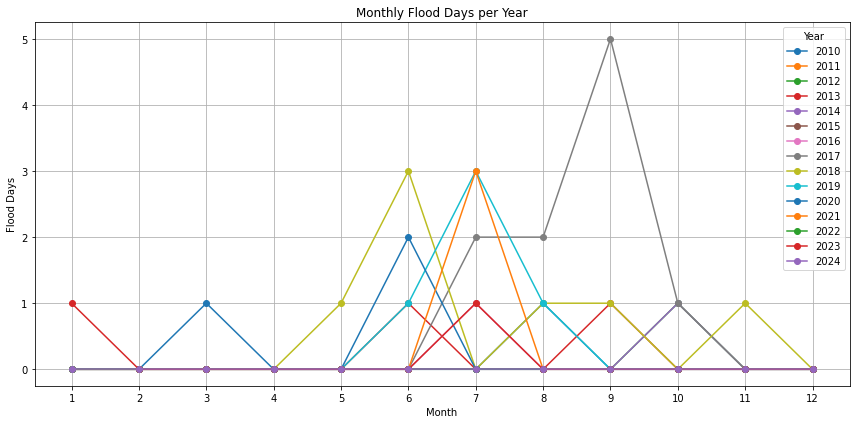

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for year in sorted(flood_by_month['Year'].unique()):
    data = flood_by_month[flood_by_month['Year'] == year]
    plt.plot(data['Month'], data['FLOOD_OCCURRED'], label=str(year), marker='o')

plt.title('Monthly Flood Days per Year')
plt.xlabel('Month')
plt.ylabel('Flood Days')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

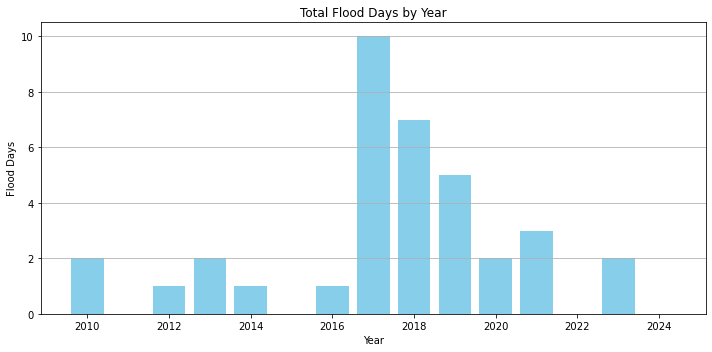

In [44]:
flood_by_year = final_data.groupby('Year')['FLOOD_OCCURRED'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(flood_by_year['Year'], flood_by_year['FLOOD_OCCURRED'], color='skyblue')
plt.title('Total Flood Days by Year')
plt.xlabel('Year')
plt.ylabel('Flood Days')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [45]:
non_flood_days = final_data[final_data['FLOOD_OCCURRED'] == 0]
print(non_flood_days.head())

       STATION                                       NAME       DATE  PRCP  \
0  USW00014739  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US 2010-01-03   0.2   
1  USW00014739  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US 2010-01-04   0.0   
2  USW00014739  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US 2010-01-05   0.0   
3  USW00014739  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US 2010-01-06   0.0   
4  USW00014739  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US 2010-01-07   0.0   

   SNOW  River_Level_m  Soil_Moisture_%  FLOOD_OCCURRED EVENT_TYPE  \
0   3.7       1.694307        31.214969               0        NaN   
1   0.0       1.956909        29.650844               0        NaN   
2   0.0       1.429754        43.580733               0        NaN   
3   0.0       1.429759        30.869900               0        NaN   
4   0.0       1.973764        39.981886               0        NaN   

  BEGIN_LOCATION  Year  Month  
0            NaN  2010      1  
1            NaN  2010      1  
2            N

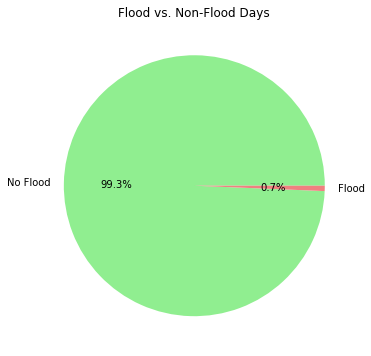

In [46]:
# Optional: Compare flood vs. non-flood with a pie chart:
import matplotlib.pyplot as plt

flood_counts = final_data['FLOOD_OCCURRED'].value_counts()
labels = ['No Flood', 'Flood']
plt.figure(figsize=(6, 6))
plt.pie(flood_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Flood vs. Non-Flood Days')
plt.show()

In [47]:
num_non_flood_days = (final_data['FLOOD_OCCURRED'] == 0).sum()
print(f"Total number of days without flood: {num_non_flood_days}")

Total number of days without flood: 5451


flood events grouped by year, month, and region:

In [48]:
# Ensure DATE is datetime (you said it's already transformed)
# Extract year and month
final_data['YEAR'] = final_data['DATE'].dt.year
final_data['MONTH'] = final_data['DATE'].dt.month

# Filter only flood events
flood_events = final_data[final_data['FLOOD_OCCURRED'] == 1]

# Group by year, month, and region (we'll use 'NAME' as proxy for region)
flood_summary = flood_events.groupby(['YEAR', 'MONTH', 'NAME']).size().reset_index(name='FLOOD_COUNT')

# Print the summary
print(flood_summary)

    YEAR  MONTH                                       NAME  FLOOD_COUNT
0   2010      3  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US            1
1   2010      8  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US            1
2   2012     10  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US            1
3   2013      6  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US            1
4   2013      9  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US            1
5   2014     10  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US            1
6   2016      7  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US            1
7   2017      7  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US            2
8   2017      8  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US            2
9   2017      9  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US            5
10  2017     10  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US            1
11  2018      5  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US            1
12  2018      6  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US      

In [49]:
C

NameError: name 'C' is not defined

In [50]:
# later i will come back to this data set and add BEGIN_LOCATION in my final data set. I want to see the regions of flood acurrance 
print(flood_data.columns)

Index(['EVENT_ID', 'CZ_NAME_STR', 'BEGIN_LOCATION', 'DATE', 'BEGIN_TIME',
       'EVENT_TYPE', 'MAGNITUDE', 'TOR_F_SCALE', 'DEATHS_DIRECT',
       'INJURIES_DIRECT', 'DAMAGE_PROPERTY_NUM', 'DAMAGE_CROPS_NUM',
       'STATE_ABBR', 'CZ_TIMEZONE', 'MAGNITUDE_TYPE', 'EPISODE_ID', 'CZ_TYPE',
       'CZ_FIPS', 'WFO', 'INJURIES_INDIRECT', 'DEATHS_INDIRECT', 'SOURCE',
       'FLOOD_CAUSE', 'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'END_DATE',
       'END_TIME', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EVENT_NARRATIVE', 'EPISODE_NARRATIVE', 'ABSOLUTE_ROWNUMBER'],
      dtype='object')


<AxesSubplot:title={'center':'Number of Floods per Year'}, xlabel='Year', ylabel='Flood Count'>

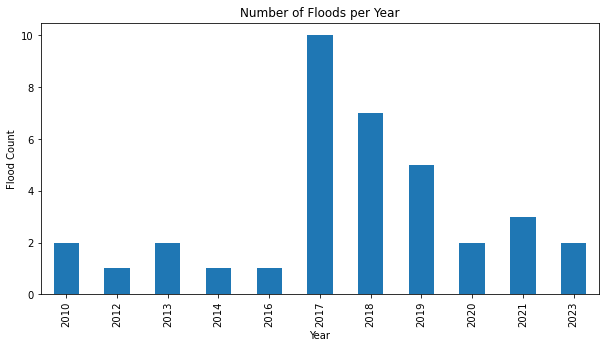

In [51]:
#See how flood frequency changes year to year
final_data[final_data['FLOOD_OCCURRED'] == 1]['DATE'].dt.year.value_counts().sort_index().plot(
    kind='bar',
    title='Number of Floods per Year',
    xlabel='Year',
    ylabel='Flood Count',
    figsize=(10,5)
)

<AxesSubplot:title={'center':'Flood Events Over Time'}, xlabel='Date', ylabel='Floods'>

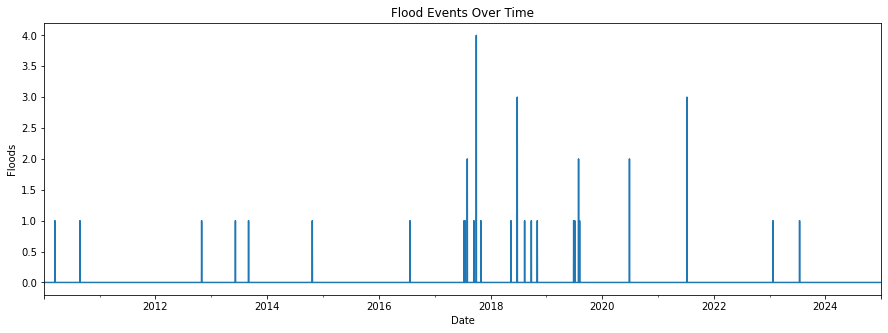

In [52]:
# Shows exactly when floods occurred across all years.
floods_by_day = final_data.groupby('DATE')['FLOOD_OCCURRED'].sum()
floods_by_day.plot(
    kind='line',
    title='Flood Events Over Time',
    xlabel='Date',
    ylabel='Floods',
    figsize=(15,5)
)

<AxesSubplot:title={'center':'Flood Occurrence vs. Precipitation'}, xlabel='PRCP', ylabel='FLOOD_OCCURRED'>

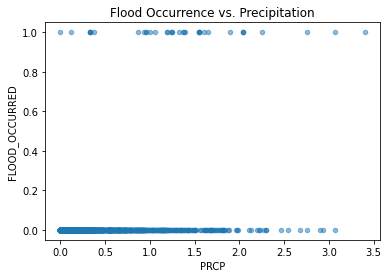

In [53]:
# Floods vs Rainfall
final_data.plot(
    kind='scatter',
    x='PRCP',
    y='FLOOD_OCCURRED',
    alpha=0.5,
    title='Flood Occurrence vs. Precipitation'
)

Plot floods by region and time

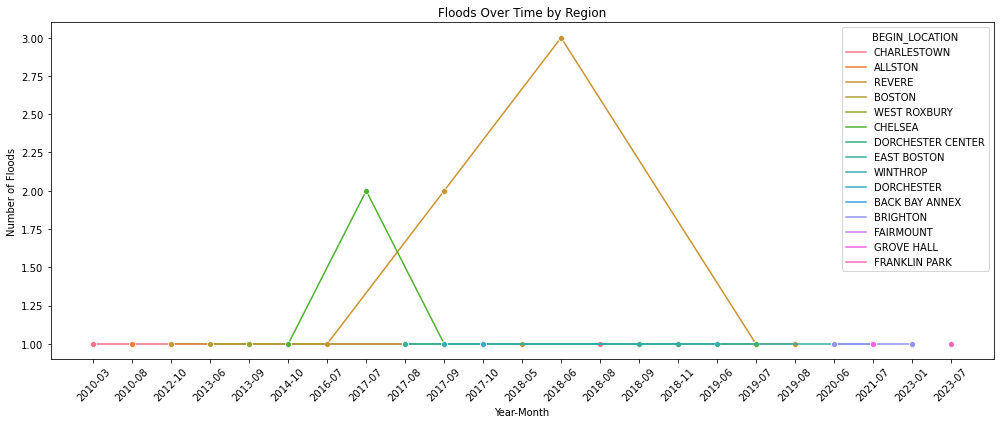

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with no flood
floods_only = final_data[final_data['FLOOD_OCCURRED'] == 1].copy()

# Group by month and location
floods_only['YearMonth'] = floods_only['DATE'].dt.to_period('M').astype(str)  # Fix: Convert to string
flood_counts = floods_only.groupby(['YearMonth', 'BEGIN_LOCATION']).size().reset_index(name='Flood_Count')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=flood_counts, x='YearMonth', y='Flood_Count', hue='BEGIN_LOCATION', marker="o")
plt.title('Floods Over Time by Region')
plt.xlabel('Year-Month')
plt.ylabel('Number of Floods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


filter for just the four regions — Dorchester, East Boston, South Boston, and Charlestown 

<ipython-input-55-56c77d4030d9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_floods['YearMonth'] = filtered_floods['DATE'].dt.to_period('M').astype(str)


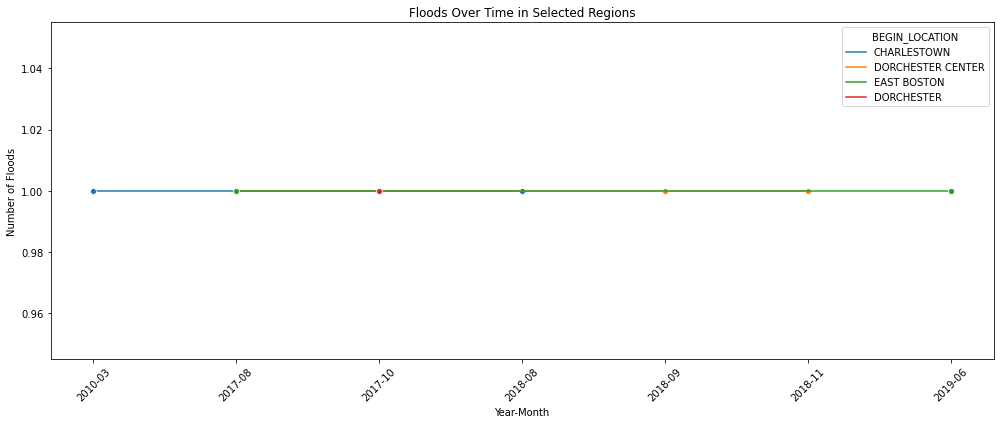

In [55]:
# Define the regions of interest
regions_of_interest = ['Dorchester', 'East Boston', 'South Boston', 'Charlestown']

# Filter the floods_only DataFrame for just those regions
filtered_floods = floods_only[floods_only['BEGIN_LOCATION'].str.contains('|'.join(regions_of_interest), case=False, na=False)]

# Group by month and location
filtered_floods['YearMonth'] = filtered_floods['DATE'].dt.to_period('M').astype(str)
flood_counts = filtered_floods.groupby(['YearMonth', 'BEGIN_LOCATION']).size().reset_index(name='Flood_Count')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=flood_counts, x='YearMonth', y='Flood_Count', hue='BEGIN_LOCATION', marker="o")
plt.title('Floods Over Time in Selected Regions')
plt.xlabel('Year-Month')
plt.ylabel('Number of Floods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-56-3d7cff1fc7b7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_floods['YearMonth'] = filtered_floods['DATE'].dt.to_period('M').astype(str)


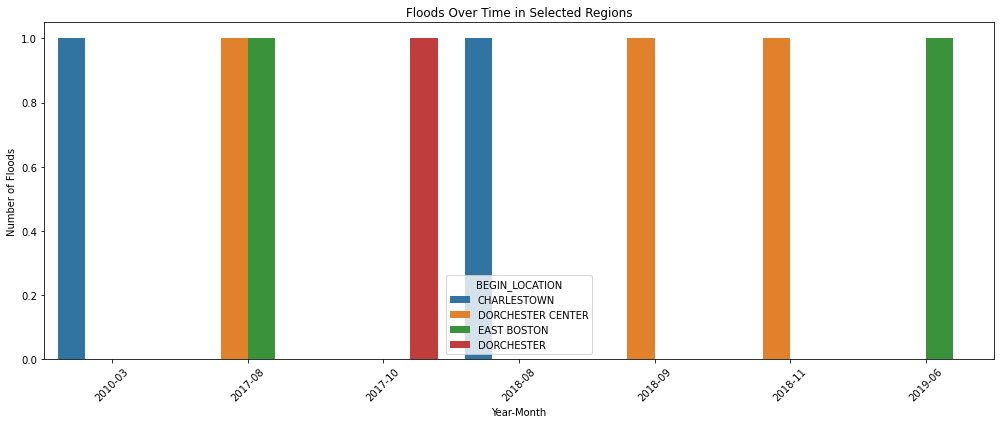

In [56]:

# Define the regions of interest
regions_of_interest = ['Dorchester', 'East Boston', 'South Boston', 'Charlestown']

# Filter the floods_only DataFrame for just those regions
filtered_floods = floods_only[floods_only['BEGIN_LOCATION'].str.contains('|'.join(regions_of_interest), case=False, na=False)]

# Group by month and location
filtered_floods['YearMonth'] = filtered_floods['DATE'].dt.to_period('M').astype(str)
flood_counts = filtered_floods.groupby(['YearMonth', 'BEGIN_LOCATION']).size().reset_index(name='Flood_Count')

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=flood_counts, x='YearMonth', y='Flood_Count', hue='BEGIN_LOCATION', ci=None)
plt.title('Floods Over Time in Selected Regions')
plt.xlabel('Year-Month')
plt.ylabel('Number of Floods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

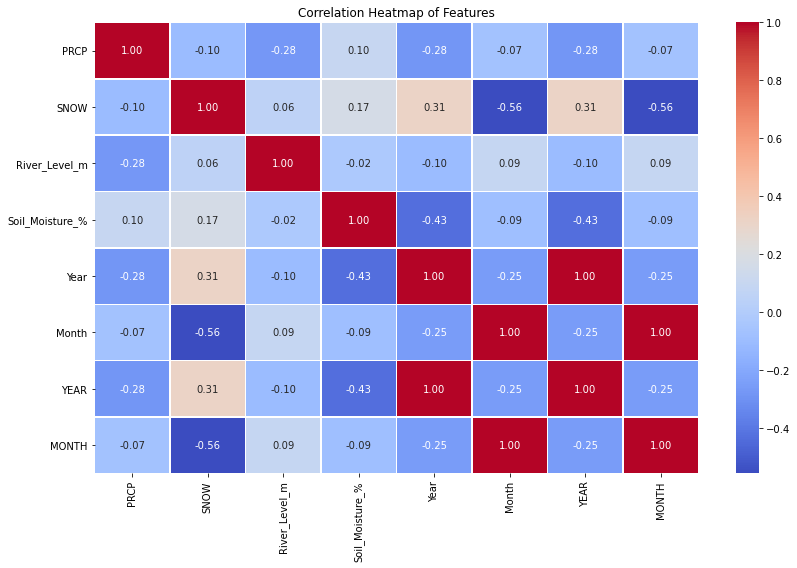

In [57]:
# Select only numerical columns
numerical_data = floods_only.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

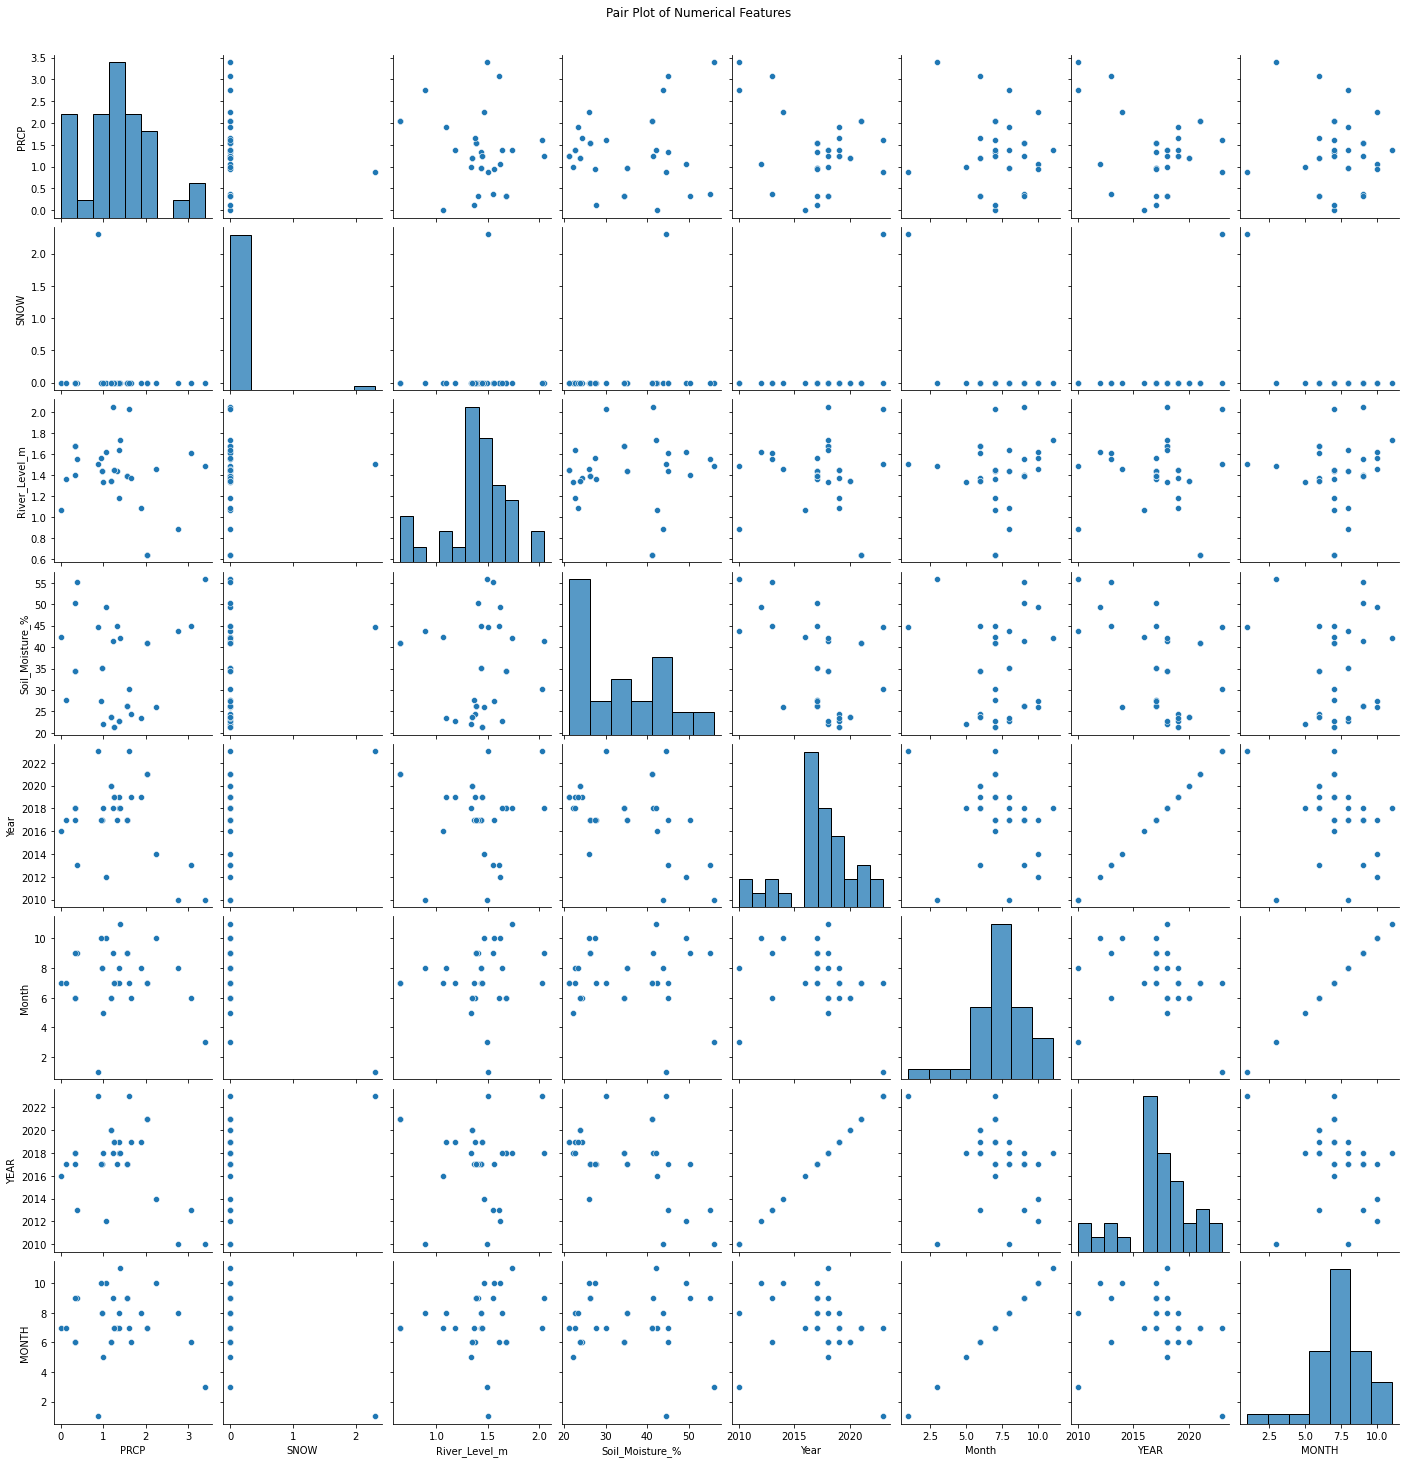

In [58]:
#  Pair Plot (Scatterplot Matrix)
sns.pairplot(numerical_data)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [59]:
# Safely interpolate using .loc
numerical_data.loc[:, 'PRCP'] = numerical_data['PRCP'].interpolate(method='linear')
numerical_data.loc[:, 'SNOW'] = numerical_data['SNOW'].interpolate(method='linear')
numerical_data.isnull().sum()

C:\Users\marce\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


PRCP               0
SNOW               0
River_Level_m      0
Soil_Moisture_%    0
Year               0
Month              0
YEAR               0
MONTH              0
dtype: int64

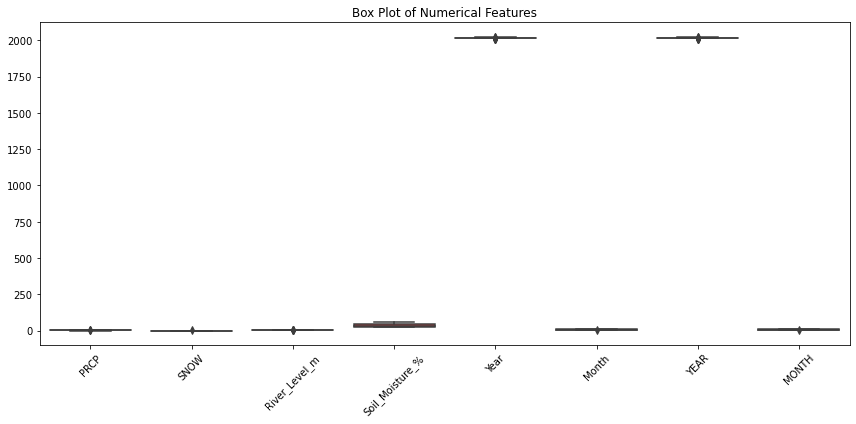

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_data)
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

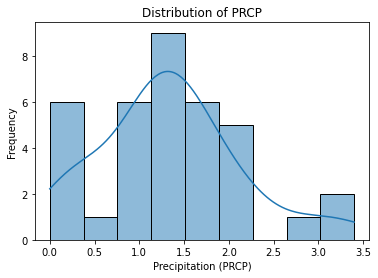

In [61]:
sns.histplot(data=numerical_data, x='PRCP', kde=True)
plt.title('Distribution of PRCP')
plt.xlabel('Precipitation (PRCP)')
plt.ylabel('Frequency')
plt.show()

In [62]:
final_data.head(2)

,STATION,NAME,DATE,PRCP,SNOW,River_Level_m,Soil_Moisture_%,FLOOD_OCCURRED,EVENT_TYPE,BEGIN_LOCATION,Year,Month,YEAR,MONTH
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-03,0.2,3.7,1.694307,31.214969,0,NaN,NaN,2010,1,2010,1
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2010-01-04,0.0,0.0,1.956909,29.650844,0,NaN,NaN,2010,1,2010,1


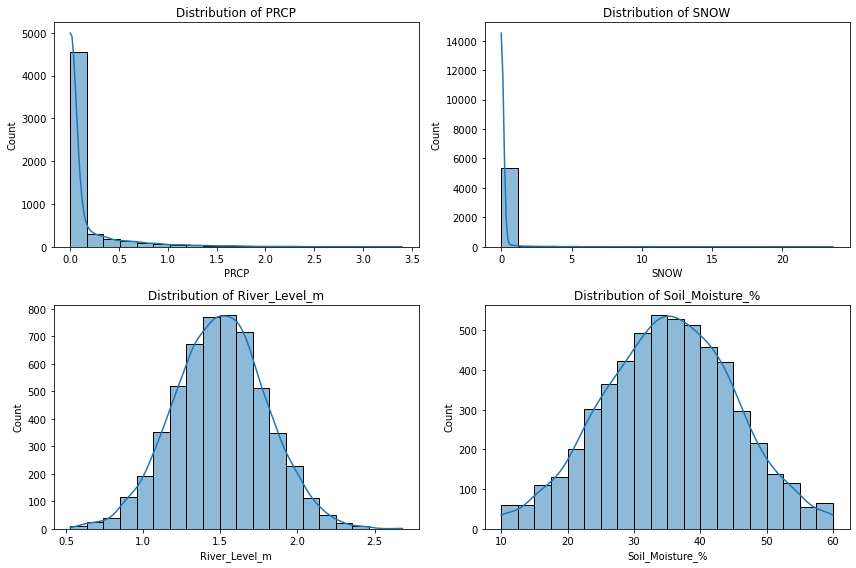

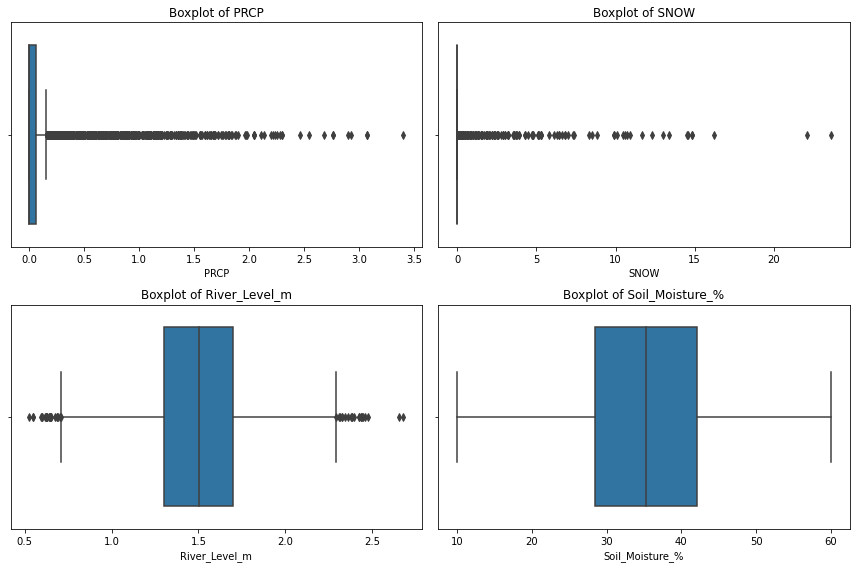

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of numerical columns
numerical_columns = ['PRCP', 'SNOW', 'River_Level_m', 'Soil_Moisture_%']

# Plot histograms for each numerical feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(final_data[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Boxplots to visualize potential outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=final_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [64]:
# Display statistical summary of numerical features
final_data[numerical_columns].describe()

,PRCP,SNOW,River_Level_m,Soil_Moisture_%
count,5487.000000,5487.000000,5487.000000,5487.000000
mean,0.121746,0.117459,1.500170,35.194326
std,0.316515,0.952337,0.298288,9.905921
min,0.000000,0.000000,0.527620,10.000000
25%,0.000000,0.000000,1.302545,28.383076
50%,0.000000,0.000000,1.501013,35.304531
75%,0.060000,0.000000,1.697640,42.085324
max,3.400000,23.600000,2.677871,60.000000


In [65]:
from sklearn.preprocessing import StandardScaler

# Scale the numerical features
scaler = StandardScaler()
final_data_scaled = final_data.copy()
final_data_scaled[numerical_columns] = scaler.fit_transform(final_data[numerical_columns])

# Check the scaled data
final_data_scaled[numerical_columns].describe()

,PRCP,SNOW,River_Level_m,Soil_Moisture_%
count,5.487000e+03,5.487000e+03,5.487000e+03,5.487000e+03
mean,-1.616268e-16,2.113152e-15,4.818149e-16,-2.980221e-16
std,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00
min,-3.846803e-01,-1.233493e-01,-3.260740e+00,-2.543592e+00
25%,-3.846803e-01,-1.233493e-01,-6.625913e-01,-6.876564e-01
50%,-3.846803e-01,-1.233493e-01,2.824799e-03,1.112623e-02
75%,-1.950985e-01,-1.233493e-01,6.620710e-01,6.957078e-01
max,1.035829e+01,2.466005e+01,3.948565e+00,2.504354e+00


# Model Development

In [66]:
# the target is FLOOD_OCCURRED (0 or 1), and numerical features are:
features = ['PRCP', 'SNOW', 'River_Level_m', 'Soil_Moisture_%']
X = final_data[features]
y = final_data['FLOOD_OCCURRED']

In [67]:
X

,PRCP,SNOW,River_Level_m,Soil_Moisture_%
0,0.20,3.7,1.694307,31.214969
1,0.00,0.0,1.956909,29.650844
2,0.00,0.0,1.429754,43.580733
3,0.00,0.0,1.429759,30.869900
4,0.00,0.0,1.973764,39.981886
...,...,...,...,...
5482,0.00,0.0,1.449044,37.940441
5483,0.11,0.0,1.991022,46.840800
5484,0.01,0.0,1.445010,32.857925
5485,0.52,0.0,1.494062,26.427123


In [68]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5482    0
5483    0
5484    0
5485    0
5486    0
Name: FLOOD_OCCURRED, Length: 5487, dtype: int32

# Split into Train, Validation, and Test

In [69]:
from sklearn.model_selection import train_test_split

# First split off the test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Then split the remaining 80% into train (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

Scale Features

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [71]:
X_train_scaled 

array([[-0.09711894, -0.125212  , -0.17532944,  2.16612848],
       [-0.38314517, -0.125212  ,  0.87768834, -0.71422771],
       [ 4.00259044, -0.125212  ,  0.80454136, -0.84834333],
       ...,
       [-0.19246102, -0.125212  ,  0.1827315 , -0.22033773],
       [-0.38314517, -0.125212  , -0.02871126, -0.26121175],
       [-0.38314517, -0.125212  , -1.44614602, -0.03609427]])

In [72]:
scaler

StandardScaler()

# Train Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# Validate the Model (on Validation Set)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_val_pred = log_reg.predict(X_val_scaled)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.994535519125683
Validation Confusion Matrix:
 [[1091    0]
 [   6    1]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1091
           1       1.00      0.14      0.25         7

    accuracy                           0.99      1098
   macro avg       1.00      0.57      0.62      1098
weighted avg       0.99      0.99      0.99      1098



# Predict 2025–2030

 Randomly shuffle the data and ignore the time-based constraint, I will switching back to a standard classification task rather than a time-series forecast.

That means I can randomly split the dataset into training, validation, and test sets — regardless of the year. This is totally valid if the goal is to build a general flood predictor rather than forecast future years chronologically.

 Define Features and Target

In [75]:
features = ['PRCP', 'SNOW', 'River_Level_m', 'Soil_Moisture_%']
X = final_data[features]
y = final_data['FLOOD_OCCURRED']

In [76]:
X

,PRCP,SNOW,River_Level_m,Soil_Moisture_%
0,0.20,3.7,1.694307,31.214969
1,0.00,0.0,1.956909,29.650844
2,0.00,0.0,1.429754,43.580733
3,0.00,0.0,1.429759,30.869900
4,0.00,0.0,1.973764,39.981886
...,...,...,...,...
5482,0.00,0.0,1.449044,37.940441
5483,0.11,0.0,1.991022,46.840800
5484,0.01,0.0,1.445010,32.857925
5485,0.52,0.0,1.494062,26.427123


 Random Split into Train, Validation, and Test

In [77]:
from sklearn.model_selection import train_test_split

# First split test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Then split remaining 80% into train (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# This gives me:

#60% training

#20% validation

#20% test
#All randomly sampled from any year.

Standardize (Scale) the Features

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Train Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Evaluate on Validation and Test Sets

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Validation
y_val_pred = model.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Test
y_test_pred = model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Accuracy: 0.994535519125683
Test Accuracy: 0.9927140255009107
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1091
           1       0.33      0.14      0.20         7

    accuracy                           0.99      1098
   macro avg       0.66      0.57      0.60      1098
weighted avg       0.99      0.99      0.99      1098



Tune parameters using the validation set

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

params = [0.01, 0.1, 1, 10, 100]
results = []

for c in params:
    model = LogisticRegression(C=c, solver='liblinear', penalty='l2')
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    f1 = f1_score(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    results.append((c, f1, acc))

# Print results
for c, f1, acc in results:
    print(f"C={c} | F1 Score: {f1:.3f} | Accuracy: {acc:.3f}")

C=0.01 | F1 Score: 0.000 | Accuracy: 0.994
C=0.1 | F1 Score: 0.250 | Accuracy: 0.995
C=1 | F1 Score: 0.250 | Accuracy: 0.995
C=10 | F1 Score: 0.250 | Accuracy: 0.995
C=100 | F1 Score: 0.250 | Accuracy: 0.995


Retrain with best parameter and test

In [82]:
import numpy as np
# Combine training and validation sets
X_full_train = scaler.fit_transform(np.concatenate((X_train, X_val)))
y_full_train = np.concatenate((y_train, y_val))

# Final model
best_C = 1  # for example
final_model = LogisticRegression(C=best_C, solver='liblinear')
final_model.fit(X_full_train, y_full_train)

# Evaluate on test set
y_test_pred = final_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))

Test Accuracy: 0.9927140255009107
Test F1 Score: 0.2


Plot performance over C values

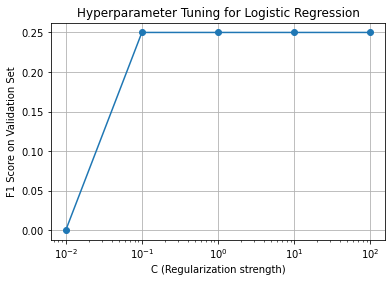

In [83]:
import matplotlib.pyplot as plt

c_vals = [r[0] for r in results]
f1_vals = [r[1] for r in results]

plt.plot(c_vals, f1_vals, marker='o')
plt.xscale('log')
plt.xlabel("C (Regularization strength)")
plt.ylabel("F1 Score on Validation Set")
plt.title("Hyperparameter Tuning for Logistic Regression")
plt.grid(True)
plt.show()

Tuned the regularization strength C for Logistic Regression using a validation set. The F1 Score peaked at C=1, which was selected as our final model configuration because it best balanced recall and precision for the flood prediction task

# Produce alternative models

To produce alternative models and potentially improve your flood prediction model, first lests  do Feature Engineering (Increase/Decrease Features)

Adding Derivative Features
Polynomial Features, by create higher-degree polynomial features to capture non-linear relationships between features and flood occurrences.

In [84]:

# Create Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features (degree 2 for simplicity)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_val = poly.transform(X_val_scaled)
X_poly_test = poly.transform(X_test_scaled)

# Now train a model on these expanded features
model = LogisticRegression(C=1, solver='liblinear')
model.fit(X_poly_train, y_train)
y_val_pred = model.predict(X_poly_val)
print("F1 Score with Polynomial Features:", f1_score(y_val, y_val_pred)) 

F1 Score with Polynomial Features: 0.25


# Try Alternative Learning Methods

In [85]:
# Random Forests can capture non-linear relationships and are robust to overfitting.

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_val_pred_rf = rf_model.predict(X_val_scaled)
print("Random Forest F1 Score on Validation Set:", f1_score(y_val, y_val_pred_rf))

Random Forest F1 Score on Validation Set: 0.5714285714285714


# Tune Hyperparameters for Alternative Models

In [87]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Best model
best_rf_model = grid_search.best_estimator_
y_val_pred_best_rf = best_rf_model.predict(X_val_scaled)
print("Best Random Forest F1 Score:", f1_score(y_val, y_val_pred_best_rf))

Best Random Forest F1 Score: 0.4615384615384615


# Compare the Models

In [88]:
# Compare The models using the same validation set

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

# Random Forest Confusion Matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rf))
print(classification_report(y_val, y_val_pred_rf))



# Logistic Regression Confusion Matrix
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Random Forest Confusion Matrix:
[[1088    3]
 [   3    4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1091
           1       0.57      0.57      0.57         7

    accuracy                           0.99      1098
   macro avg       0.78      0.78      0.78      1098
weighted avg       0.99      0.99      0.99      1098

Logistic Regression Confusion Matrix:
[[1091    0]
 [   6    1]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1091
           1       1.00      0.14      0.25         7

    accuracy                           0.99      1098
   macro avg       1.00      0.57      0.62      1098
weighted avg       0.99      0.99      0.99      1098



# Visual Comparison

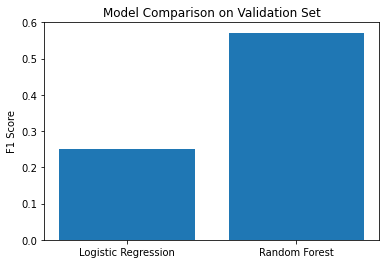

In [90]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest']
f1_scores = [f1_score(y_val, y_val_pred), f1_score(y_val, y_val_pred_rf)]

plt.bar(models, f1_scores)
plt.ylabel('F1 Score')
plt.title('Model Comparison on Validation Set')
plt.show()

# Neural Network for Flood Prediction

Prepare the Data
Use the features and target To have from the previous steps, since neural networks perform better with scaled data.

In [91]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Define the Neural Network Architecture
We will use Keras (from TensorFlow) to define a simple feed-forward neural network.

Input Layer: Same size as the number of features.

Hidden Layers: Start with two layers; you can tune the number of neurons later.

Output Layer: One neuron for binary classification (Flood Occurred: 0 or 1).

Activation Functions: ReLU for hidden layers and Sigmoid for the output layer (since it's binary classification).

Install Keras if you don't have it already:

In [92]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow-estimator<2.5.0,>=2.4.0 in c:\users\marce\anaconda3\lib\site-packages (from tensorflow) (2.4.0)




[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: C:\Users\marce\anaconda3\python.exe -m pip install --upgrade pip


Define the Model:

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Neural Network model
model = Sequential()

# Add input layer and the first hidden layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Add second hidden layer
model.add(Dense(32, activation='relu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the Neural Network

In [94]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, 
                    validation_data=(X_val_scaled, y_val), verbose=2)

Epoch 1/30
103/103 - 1s - loss: 0.2492 - accuracy: 0.9599 - val_loss: 0.0571 - val_accuracy: 0.9936
Epoch 2/30
103/103 - 0s - loss: 0.0435 - accuracy: 0.9933 - val_loss: 0.0345 - val_accuracy: 0.9936
Epoch 3/30
103/103 - 0s - loss: 0.0322 - accuracy: 0.9933 - val_loss: 0.0311 - val_accuracy: 0.9936
Epoch 4/30
103/103 - 0s - loss: 0.0289 - accuracy: 0.9933 - val_loss: 0.0282 - val_accuracy: 0.9936
Epoch 5/30
103/103 - 0s - loss: 0.0267 - accuracy: 0.9933 - val_loss: 0.0275 - val_accuracy: 0.9936
Epoch 6/30
103/103 - 0s - loss: 0.0263 - accuracy: 0.9933 - val_loss: 0.0270 - val_accuracy: 0.9936
Epoch 7/30
103/103 - 0s - loss: 0.0250 - accuracy: 0.9933 - val_loss: 0.0271 - val_accuracy: 0.9936
Epoch 8/30
103/103 - 0s - loss: 0.0244 - accuracy: 0.9933 - val_loss: 0.0271 - val_accuracy: 0.9936
Epoch 9/30
103/103 - 0s - loss: 0.0258 - accuracy: 0.9933 - val_loss: 0.0278 - val_accuracy: 0.9936
Epoch 10/30
103/103 - 0s - loss: 0.0241 - accuracy: 0.9930 - val_loss: 0.0270 - val_accuracy: 0.9936

Evaluate the Model

In [95]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Loss: {val_loss}")

35/35 [==============================] - 0s 583us/step - loss: 0.0278 - accuracy: 0.9918
Validation Accuracy: 0.9918032884597778
Validation Loss: 0.027799954637885094


Plot Training History

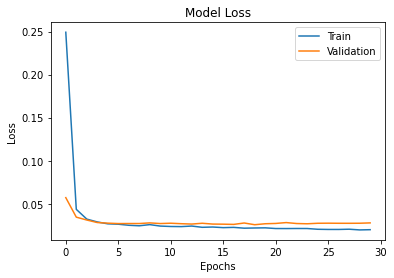

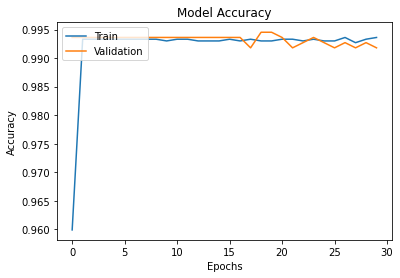

In [96]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Make Predictions and Evaluate on Test Set

In [97]:
# Make predictions on the test set
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")  # Threshold at 0.5

# Evaluate performance on the test set
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Confusion Matrix on Test Set:
[[1091    0]
 [   6    1]]
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1091
           1       1.00      0.14      0.25         7

    accuracy                           0.99      1098
   macro avg       1.00      0.57      0.62      1098
weighted avg       0.99      0.99      0.99      1098



Tuning the Neural Network

Adjusting the number of hidden layers and neurons.

Tuning the learning rate of the Adam optimizer.

Adding dropout layers to reduce overfitting.

Using batch normalization.

In [98]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))  # 20% dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # 20% dropout
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Example with Learning Rate Scheduler:

In [99]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch > 10:
        return lr * 0.1  # Decrease learning rate after 10 epochs
    return lr

lr_scheduler = LearningRateScheduler(scheduler)

history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32,
                    validation_data=(X_val_scaled, y_val), callbacks=[lr_scheduler], verbose=2)

Epoch 1/30
103/103 - 1s - loss: 0.2417 - accuracy: 0.9626 - val_loss: 0.0621 - val_accuracy: 0.9936
Epoch 2/30
103/103 - 0s - loss: 0.0508 - accuracy: 0.9933 - val_loss: 0.0344 - val_accuracy: 0.9936
Epoch 3/30
103/103 - 0s - loss: 0.0352 - accuracy: 0.9930 - val_loss: 0.0286 - val_accuracy: 0.9936
Epoch 4/30
103/103 - 0s - loss: 0.0308 - accuracy: 0.9936 - val_loss: 0.0273 - val_accuracy: 0.9936
Epoch 5/30
103/103 - 0s - loss: 0.0294 - accuracy: 0.9927 - val_loss: 0.0272 - val_accuracy: 0.9936
Epoch 6/30
103/103 - 0s - loss: 0.0285 - accuracy: 0.9936 - val_loss: 0.0272 - val_accuracy: 0.9936
Epoch 7/30
103/103 - 0s - loss: 0.0274 - accuracy: 0.9930 - val_loss: 0.0274 - val_accuracy: 0.9936
Epoch 8/30
103/103 - 0s - loss: 0.0259 - accuracy: 0.9936 - val_loss: 0.0270 - val_accuracy: 0.9936
Epoch 9/30
103/103 - 0s - loss: 0.0280 - accuracy: 0.9930 - val_loss: 0.0273 - val_accuracy: 0.9936
Epoch 10/30
103/103 - 0s - loss: 0.0252 - accuracy: 0.9933 - val_loss: 0.0269 - val_accuracy: 0.9936

 ## Learning curve
 For each learning setting, generate a learning curve and decide if  can
benefit from collecting more training examples.
Comment on the quality of the fit for each model (underfit / overfit) and
demonstrate your reasons.


To generate a learning curve and analyze the performance of the models (Logistic Regression, Neural Network, and Random Forest), I will follow these steps for each algorithm. 
The goal of the learning curve is to help assess how well the model is performing with varying amounts of training data and to understand whether collecting more training examples could improve your model.

Learning Curve Explanation
Underfitting: The model is too simple and unable to capture the underlying patterns in the data. The training and validation errors are both high.

Overfitting: The model is too complex and has memorized the training data, leading to excellent training performance but poor generalization to new data (i.e., high training accuracy but low validation accuracy).

Good Fit: The model performs well on both training and validation data, with training error converging to a low level, and validation error stabilizing without a significant gap.

## Steps to Generate Learning Curves:
Plot the training and validation performance for different sizes of the training set.

For each model,I will train the model using increasing fractions of the training data.

Track the training and validation loss/accuracy at each step.

Plot these values over the training data size


 ## learning curve for Logistic Regression:

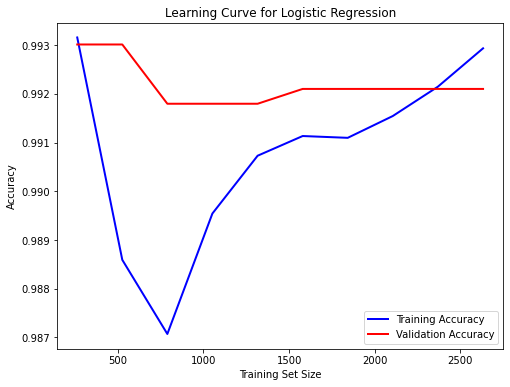

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model_lr, X_train, y_train, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    cv=5, n_jobs=-1, scoring='accuracy'
)

# Calculate the mean values for train and validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

# Plot learning curve without color fill
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='b', linestyle='-', linewidth=2)
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color='r', linestyle='-', linewidth=2)
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Neural Network Learning Curve

Using TensorFlow backend.


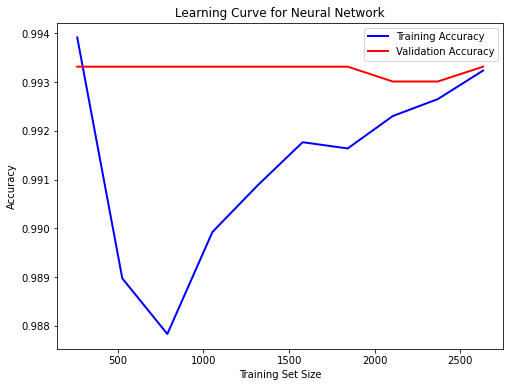

In [101]:
from sklearn.model_selection import learning_curve
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define your neural network model as a function
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier
model_nn = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model_nn, X_train, y_train, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    cv=5, n_jobs=-1, scoring='accuracy'
)

# Calculate mean values for training and validation
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

# Plot learning curve without color fill
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='b', linestyle='-', linewidth=2)
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color='r', linestyle='-', linewidth=2)
plt.title('Learning Curve for Neural Network')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [102]:
## Random Forest Learning Curve

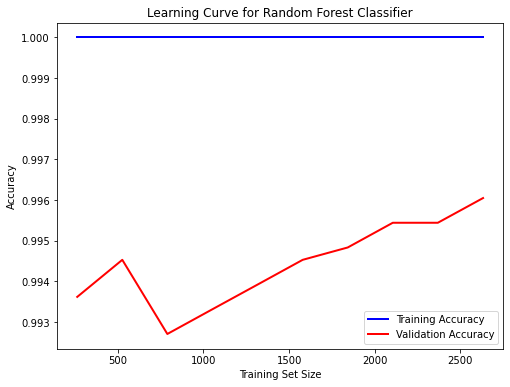

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Define RandomForestClassifier model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate learning curves for RandomForestClassifier
train_sizes, train_scores, val_scores = learning_curve(
    model_rf, X_train, y_train, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    cv=5, n_jobs=-1, scoring='accuracy'
)

# Calculate the mean values for train and validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

# Plot learning curve without color fill
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='b', linestyle='-', linewidth=2)
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color='r', linestyle='-', linewidth=2)
plt.title('Learning Curve for Random Forest Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Now lest's looking to plot the cost function 
𝐽
(
𝑤
,
𝑏
)
J(w,b) versus the training set size 
𝑚
m, instead of accuracy.

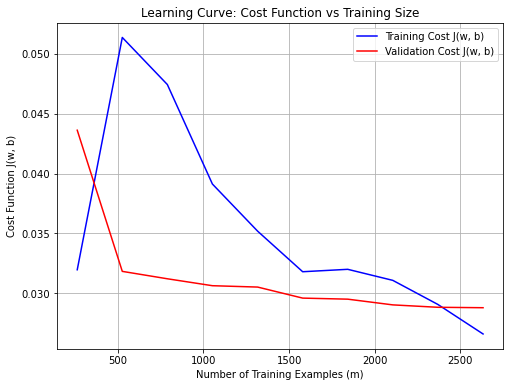

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Get learning curve data (neg_log_loss because sklearn maximizes scores)
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1
)

# Convert from negative log-loss to positive for plotting J(w, b)
train_loss = -train_scores.mean(axis=1)
val_loss = -val_scores.mean(axis=1)

# Plot the cost function J(w, b) vs. m
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, label='Training Cost J(w, b)', color='blue', linestyle='-')
plt.plot(train_sizes, val_loss, label='Validation Cost J(w, b)', color='red', linestyle='-')
plt.title('Learning Curve: Cost Function vs Training Size')
plt.xlabel('Number of Training Examples (m)')
plt.ylabel('Cost Function J(w, b)')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest Learning Curve with Log-Loss:

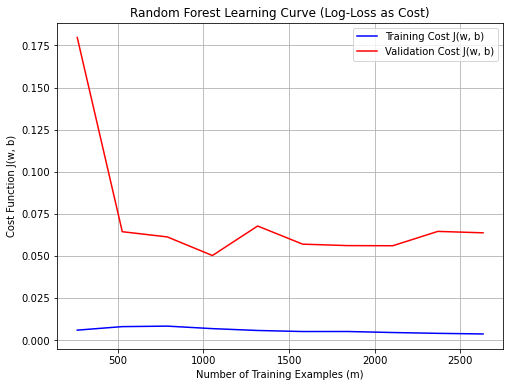

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Get learning curve data (use log-loss)
train_sizes, train_scores, val_scores = learning_curve(
    rf_model,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1
)

# Convert from negative log-loss to positive for plotting
train_loss = -train_scores.mean(axis=1)
val_loss = -val_scores.mean(axis=1)

# Plot the cost function J(w, b) vs. m
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, label='Training Cost J(w, b)', color='blue', linestyle='-')
plt.plot(train_sizes, val_loss, label='Validation Cost J(w, b)', color='red', linestyle='-')
plt.title('Random Forest Learning Curve (Log-Loss as Cost)')
plt.xlabel('Number of Training Examples (m)')
plt.ylabel('Cost Function J(w, b)')
plt.legend()
plt.grid(True)
plt.show()

log-loss cost function for a neural network

Analyze your success
● Execute each method on the same test data, and compare their ROC curves
and their AUC.
● Calculate your precision and recall.
● Compare the errors that these methods make. Put those errors in a Venn
diagram so that we can see if the methods make similar errors.
● Select some sample errors and comment on why they are misclassified

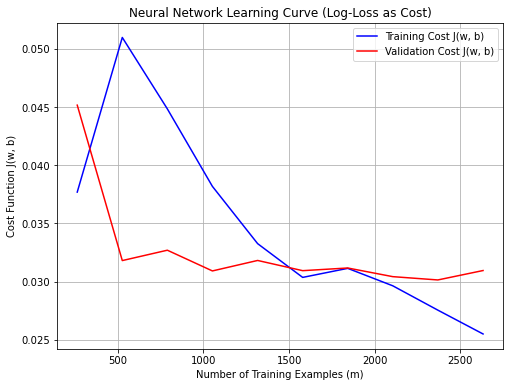

In [103]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Get learning curve data using log-loss
train_sizes, train_scores, val_scores = learning_curve(
    nn_model,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1
)

# Compute average log-loss across folds
train_loss = -train_scores.mean(axis=1)
val_loss = -val_scores.mean(axis=1)

# Plot J(w, b) vs m
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, label='Training Cost J(w, b)', color='blue')
plt.plot(train_sizes, val_loss, label='Validation Cost J(w, b)', color='red')
plt.title('Neural Network Learning Curve (Log-Loss as Cost)')
plt.xlabel('Number of Training Examples (m)')
plt.ylabel('Cost Function J(w, b)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate All Models on the Same Test Set

In [108]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

# Get Predictions and Probabilities

In [109]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score

# Assuming these models are already trained:
# logistic_model, rf_model, nn_model

models = {
    'Logistic Regression': logistic_model,
    'Random Forest': rf_model,
    'Neural Network': nn_model
}

y_preds = {}
y_probas = {}
for name, model in models.items():
    y_preds[name] = model.predict(X_test)
    y_probas[name] = model.predict_proba(X_test)[:, 1]  # Prob for ROC/AUC

# ROC Curve and AUC Comparison

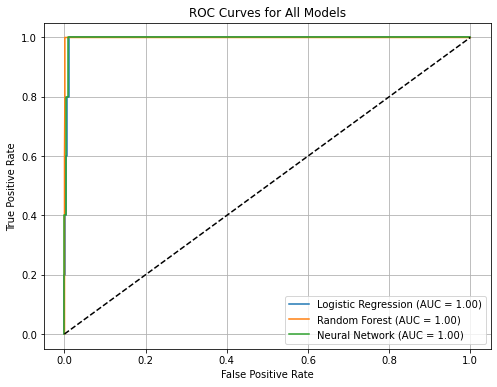

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
for name in models:
    fpr, tpr, _ = roc_curve(y_test, y_probas[name])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

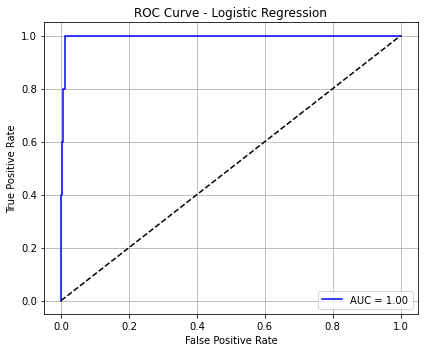

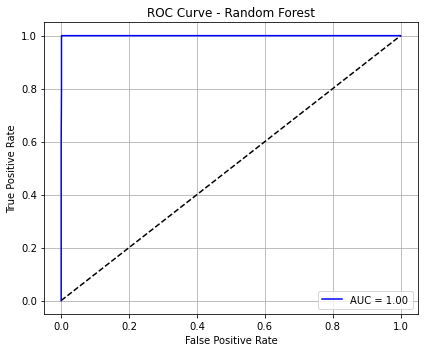

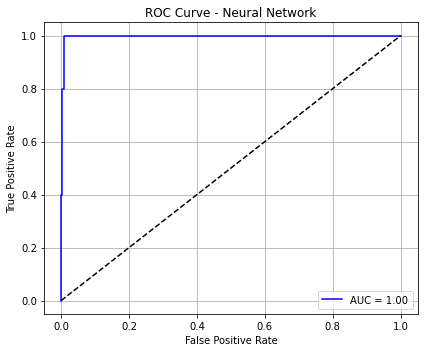

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

for name in models:
    fpr, tpr, _ = roc_curve(y_test, y_probas[name])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Precision & Recall

In [112]:
for name in models:
    precision = precision_score(y_test, y_preds[name])
    recall = recall_score(y_test, y_preds[name])
    print(f'{name}: Precision = {precision:.2f}, Recall = {recall:.2f}')

Logistic Regression: Precision = 1.00, Recall = 0.20
Random Forest: Precision = 0.83, Recall = 1.00
Neural Network: Precision = 1.00, Recall = 0.20


# Compare Errors with a Venn Diagram

In [114]:
# Predict on the test set with each model
y_preds = {
    'Logistic Regression': logistic_model.predict(X_test),
    'Random Forest': rf_model.predict(X_test),
    'Neural Network': nn_model.predict(X_test)
}
y_preds

{'Logistic Regression': array([0, 0, 0, ..., 0, 0, 0]),
 'Random Forest': array([0, 0, 0, ..., 0, 0, 0]),
 'Neural Network': array([0, 0, 0, ..., 0, 0, 0])}

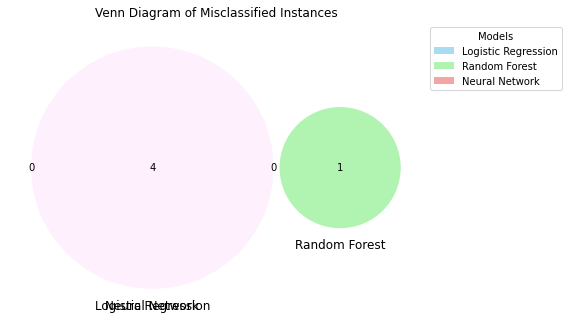

In [115]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import numpy as np

# Define error sets again if needed
errors = {
    'LR': set(np.where(y_preds['Logistic Regression'] != y_test)[0]),
    'RF': set(np.where(y_preds['Random Forest'] != y_test)[0]),
    'NN': set(np.where(y_preds['Neural Network'] != y_test)[0])
}

# Plot the Venn diagram with distinct colors
plt.figure(figsize=(8,6))
venn = venn3(
    [errors['LR'], errors['RF'], errors['NN']],
    set_labels=('Logistic Regression', 'Random Forest', 'Neural Network'),
    set_colors=('skyblue', 'lightgreen', 'lightcoral'),
    alpha=0.7
)

# Adjust legend position to avoid overlap
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1, 1),
    title='Models',
    labels=['Logistic Regression', 'Random Forest', 'Neural Network']
)

plt.title("Venn Diagram of Misclassified Instances")
plt.tight_layout()

# Show the plot
plt.show()

# Sample Misclassifications

In [110]:
misclassified = np.where(y_preds['Random Forest'] != y_test)[0][:5]
for i in misclassified:
    print(f"Index {i}: True label = {y_test.iloc[i]}, Features = {X_test.iloc[i].to_dict()}")

Index 577: True label = 0, Features = {'PRCP': 1.43, 'SNOW': 0.0, 'River_Level_m': 1.356702766, 'Soil_Moisture_%': 22.227652433684106}


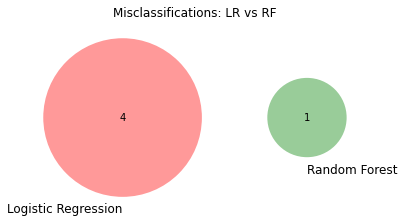

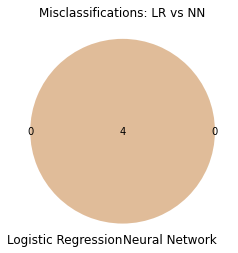

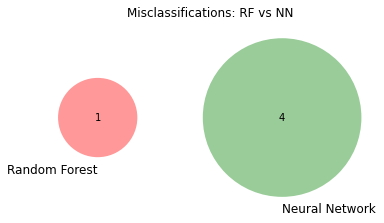

In [116]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import numpy as np

# Error sets
errors = {
    'LR': set(np.where(y_preds['Logistic Regression'] != y_test)[0]),
    'RF': set(np.where(y_preds['Random Forest'] != y_test)[0]),
    'NN': set(np.where(y_preds['Neural Network'] != y_test)[0])
}

# 1. Logistic Regression vs Random Forest
plt.figure(figsize=(6,4))
venn2([errors['LR'], errors['RF']], set_labels=('Logistic Regression', 'Random Forest'))
plt.title("Misclassifications: LR vs RF")
plt.show()

# 2. Logistic Regression vs Neural Network
plt.figure(figsize=(6,4))
venn2([errors['LR'], errors['NN']], set_labels=('Logistic Regression', 'Neural Network'))
plt.title("Misclassifications: LR vs NN")
plt.show()

# 3. Random Forest vs Neural Network
plt.figure(figsize=(6,4))
venn2([errors['RF'], errors['NN']], set_labels=('Random Forest', 'Neural Network'))
plt.title("Misclassifications: RF vs NN")
plt.show()

In [117]:
misclassified_lr = np.where(y_preds['Logistic Regression'] != y_test)[0][:5]
for i in misclassified_lr:
    print(f"Index {i}: True label = {y_test.iloc[i]}, Features = {X_test.iloc[i].to_dict()}")

Index 41: True label = 1, Features = {'PRCP': 1.25, 'SNOW': 0.0, 'River_Level_m': 1.445054859, 'Soil_Moisture_%': 21.319289060462705}
Index 388: True label = 1, Features = {'PRCP': 1.37, 'SNOW': 0.0, 'River_Level_m': 1.18181848, 'Soil_Moisture_%': 22.71496203797636}
Index 418: True label = 1, Features = {'PRCP': 1.55, 'SNOW': 0.0, 'River_Level_m': 1.390047894, 'Soil_Moisture_%': 26.184101756618443}
Index 637: True label = 1, Features = {'PRCP': 2.04, 'SNOW': 0.0, 'River_Level_m': 0.643612001, 'Soil_Moisture_%': 41.04831979114594}


In [118]:
misclassified_nn = np.where(y_preds['Neural Network'] != y_test)[0][:5]
for i in misclassified_nn:
    print(f"Index {i}: True label = {y_test.iloc[i]}, Features = {X_test.iloc[i].to_dict()}")

Index 41: True label = 1, Features = {'PRCP': 1.25, 'SNOW': 0.0, 'River_Level_m': 1.445054859, 'Soil_Moisture_%': 21.319289060462705}
Index 388: True label = 1, Features = {'PRCP': 1.37, 'SNOW': 0.0, 'River_Level_m': 1.18181848, 'Soil_Moisture_%': 22.71496203797636}
Index 418: True label = 1, Features = {'PRCP': 1.55, 'SNOW': 0.0, 'River_Level_m': 1.390047894, 'Soil_Moisture_%': 26.184101756618443}
Index 637: True label = 1, Features = {'PRCP': 2.04, 'SNOW': 0.0, 'River_Level_m': 0.643612001, 'Soil_Moisture_%': 41.04831979114594}


In [119]:
models = ['Logistic Regression', 'Random Forest', 'Neural Network']

for model in models:
    # Get misclassified indices for the current model
    misclassified = np.where(y_preds[model] != y_test)[0][:5]
    
    print(f"\nMisclassifications for {model}:")
    for i in misclassified:
        print(f"Index {i}: True label = {y_test.iloc[i]}, Features = {X_test.iloc[i].to_dict()}")


Misclassifications for Logistic Regression:
Index 41: True label = 1, Features = {'PRCP': 1.25, 'SNOW': 0.0, 'River_Level_m': 1.445054859, 'Soil_Moisture_%': 21.319289060462705}
Index 388: True label = 1, Features = {'PRCP': 1.37, 'SNOW': 0.0, 'River_Level_m': 1.18181848, 'Soil_Moisture_%': 22.71496203797636}
Index 418: True label = 1, Features = {'PRCP': 1.55, 'SNOW': 0.0, 'River_Level_m': 1.390047894, 'Soil_Moisture_%': 26.184101756618443}
Index 637: True label = 1, Features = {'PRCP': 2.04, 'SNOW': 0.0, 'River_Level_m': 0.643612001, 'Soil_Moisture_%': 41.04831979114594}

Misclassifications for Random Forest:
Index 577: True label = 0, Features = {'PRCP': 1.43, 'SNOW': 0.0, 'River_Level_m': 1.356702766, 'Soil_Moisture_%': 22.227652433684106}

Misclassifications for Neural Network:
Index 41: True label = 1, Features = {'PRCP': 1.25, 'SNOW': 0.0, 'River_Level_m': 1.445054859, 'Soil_Moisture_%': 21.319289060462705}
Index 388: True label = 1, Features = {'PRCP': 1.37, 'SNOW': 0.0, 'Rive

In [120]:
import pandas as pd

# Initialize an empty list to store the data for the table
misclassified_data = []

models = ['Logistic Regression', 'Random Forest', 'Neural Network']

# Collect data for the misclassified instances
for model in models:
    misclassified = np.where(y_preds[model] != y_test)[0][:5]
    for i in misclassified:
        misclassified_data.append({
            'Model': model,
            'Index': i,
            'True Label': y_test.iloc[i],
            'Features': X_test.iloc[i].to_dict()
        })

# Create a DataFrame from the collected data
misclassified_df = pd.DataFrame(misclassified_data)

# Display the table
print(misclassified_df)

                 Model  Index  True Label  \
0  Logistic Regression     41           1   
1  Logistic Regression    388           1   
2  Logistic Regression    418           1   
3  Logistic Regression    637           1   
4        Random Forest    577           0   
5       Neural Network     41           1   
6       Neural Network    388           1   
7       Neural Network    418           1   
8       Neural Network    637           1   

                                            Features  
0  {'PRCP': 1.25, 'SNOW': 0.0, 'River_Level_m': 1...  
1  {'PRCP': 1.37, 'SNOW': 0.0, 'River_Level_m': 1...  
2  {'PRCP': 1.55, 'SNOW': 0.0, 'River_Level_m': 1...  
3  {'PRCP': 2.04, 'SNOW': 0.0, 'River_Level_m': 0...  
4  {'PRCP': 1.43, 'SNOW': 0.0, 'River_Level_m': 1...  
5  {'PRCP': 1.25, 'SNOW': 0.0, 'River_Level_m': 1...  
6  {'PRCP': 1.37, 'SNOW': 0.0, 'River_Level_m': 1...  
7  {'PRCP': 1.55, 'SNOW': 0.0, 'River_Level_m': 1...  
8  {'PRCP': 2.04, 'SNOW': 0.0, 'River_Level_m': 0...  

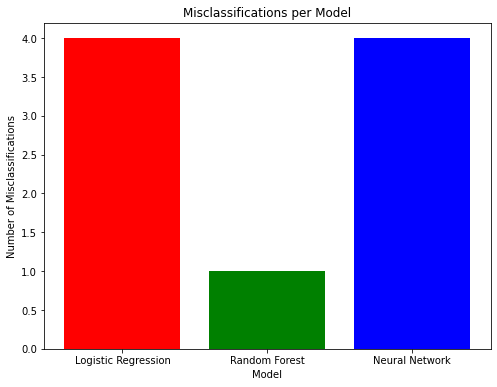

In [121]:
import matplotlib.pyplot as plt

# Initialize a dictionary to count misclassifications for each model
misclassified_counts = {model: np.sum(y_preds[model] != y_test) for model in models}

# Plot the bar chart
plt.figure(figsize=(8,6))
plt.bar(misclassified_counts.keys(), misclassified_counts.values(), color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Number of Misclassifications')
plt.title('Misclassifications per Model')
plt.show()

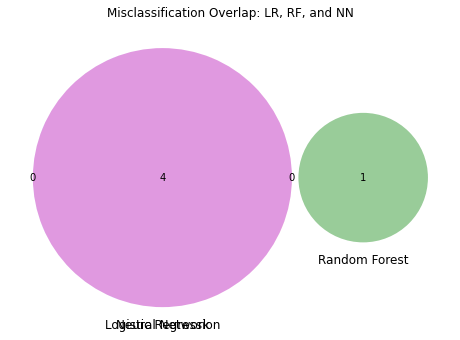

In [122]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import numpy as np

# Define the misclassified indices for each model
misclassified_lr = set([41, 388, 418, 637])  # Logistic Regression misclassifications
misclassified_rf = set([577])  # Random Forest misclassification
misclassified_nn = set([41, 388, 418, 637])  # Neural Network misclassifications

# Create the Venn diagram
plt.figure(figsize=(8, 6))

# Venn diagram for three models
venn3([misclassified_lr, misclassified_rf, misclassified_nn],
      set_labels=('Logistic Regression', 'Random Forest', 'Neural Network'))

plt.title("Misclassification Overlap: LR, RF, and NN")
plt.show()